In [2]:
import os 
import numpy as np 
import pandas as pd
from pprint import pprint
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# raw_log_path = "/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_pick_and_place.log"
# raw_log_path = "/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_pick_and_place_ycb_20240126-23:13.log"
# raw_log_path = "/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_pick_and_place_ycb_20240128-00:42.log"
# raw_log_paths = [
#     "/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_pick_and_place_20240127-23:34_GTPlanScene.log",
#     "/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_pick_and_place_20240128-11:23_GTPlanScene.log",
#     "/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_pick_and_place_20240128-15:35_GTPlanScene.log"
# ]

# raw_log_paths = glob.glob("/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_pick_and_place_20240129-00:00_*.log")

raw_log_paths = glob.glob("/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_drawer_pick_and_place_20240130-00:00_*.log")
pprint(raw_log_paths)


['/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_drawer_pick_and_place_20240130-00:00_brown_medication_bottle_gt_2d_det_gt_3d_bbox.log',
 '/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_drawer_pick_and_place_20240130-00:00_dog_figure_gt_2d_det_gt_3d_bbox.log',
 '/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_drawer_pick_and_place_20240130-00:00_brown_ceramic_cup_gt_2d_det_gt_3d_bbox.log',
 '/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_drawer_pick_and_place_20240130-00:00_Nintendo_Mario_toy_figure_gt_2d_det_gt_3d_bbox.log',
 '/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_drawer_pick_and_place_20240130-00:00_panda_toy_figure_gt_2d_det_gt_3d_bbox.log',
 '/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/log/eval_drawer_pick_and_place_20240130-00:00_white_and_brown_box_gt_2d_det_gt_3d_bbox.log',
 '/home/juntin

In [8]:
# write a function to parse the raw log to a list of dict
def parse_raw_log(raw_log_paths):
    results = []
    for raw_log_path in raw_log_paths:
        with open(raw_log_path, "r") as f:
            raw_log = f.read()
            for line in raw_log.split('\n'):
                if line.startswith(' {'):
                    results.append(eval(line))
    return results

results = parse_raw_log(raw_log_paths)

In [9]:
# make a dict: {query: <ratio of 1 in eval_iterms_results>}
def get_ratio(results):
    ratio = {} 
    for result in results:
        query = result['query']
        repeat_times = result['repeat_times']
        # skip repeated query line 
        if query in ratio:
            continue
        eval_items_results = []
        for i in range(repeat_times):
            if i not in result:
                continue
            eval_items_results.append(result[i]['eval_items_results'])
        # print(eval_items_results)
        ratio[query] = np.mean(eval_items_results, axis=0).tolist()
        
    return ratio

ratio = get_ratio(results)
pprint(ratio)

{'pick_and_place_Nintendo_Mario_toy_figure': [0.9, 0.8],
 'pick_and_place_blue_medication_bottle': [0.8, 0.6],
 'pick_and_place_brown_ceramic_cup': [0.8, 0.7],
 'pick_and_place_brown_medication_bottle': [0.7, 0.0],
 'pick_and_place_dog_figure': [0.9, 0.9],
 'pick_and_place_grey_medication_bottle': [1.0, 0.1],
 'pick_and_place_panda_toy_figure': [1.0, 0.8],
 'pick_and_place_toy_bus': [0.7, 0.1],
 'pick_and_place_white_and_brown_box': [1.0, 0.0],
 'pick_and_place_wood_block': [0.9, 0.4]}


In [ ]:
# perception data:

pnp_gt_planning_scene = {
    "pick_and_place_Nintendo_Mario_toy_figure": 0.9,
    "pick_and_place_blue_medication_bottle": 0.8,
    "pick_and_place_brown_ceramic_cup": 0.6,
    "pick_and_place_brown_medication_bottle": 1.0,
    "pick_and_place_dog_figure": 1.0,
    "pick_and_place_grey_medication_bottle": 0.6,
    "pick_and_place_panda_toy_figure": 0.9,
    "pick_and_place_toy_bus": 1.0,
    "pick_and_place_white_and_brown_box": 0.5,
    "pick_and_place_wood_block": 0.8,
}
pnp = {
    "pick_and_place_Nintendo_Mario_toy_figure": 0.8,
    "pick_and_place_blue_medication_bottle": 0.7,
    "pick_and_place_brown_ceramic_cup": 0.6,
    "pick_and_place_brown_medication_bottle": 0.7,
    "pick_and_place_dog_figure": 0.8,
    "pick_and_place_grey_medication_bottle": 0.6,
    "pick_and_place_panda_toy_figure": 0.8,
    "pick_and_place_toy_bus": 0.3,
    "pick_and_place_white_and_brown_box": 0.6,
    "pick_and_place_wood_block": 0.9,
}

drawer_pnp_gt_planning_scene = {
    "pick_and_place_Nintendo_Mario_toy_figure": [0.9, 0.8],
    "pick_and_place_blue_medication_bottle": [0.8, 0.6],
    "pick_and_place_brown_ceramic_cup": [0.8, 0.7],
    "pick_and_place_brown_medication_bottle": [0.7, 0.0],
    "pick_and_place_dog_figure": [0.9, 0.9],
    "pick_and_place_grey_medication_bottle": [1.0, 0.1],
    "pick_and_place_panda_toy_figure": [1.0, 0.8],
    "pick_and_place_toy_bus": [0.7, 0.1],
    "pick_and_place_white_and_brown_box": [1.0, 0.0],
    "pick_and_place_wood_block": [0.9, 0.4],
}

In [8]:
# make a plot to compare the ratio and gt ratio in the same histogram 


: 

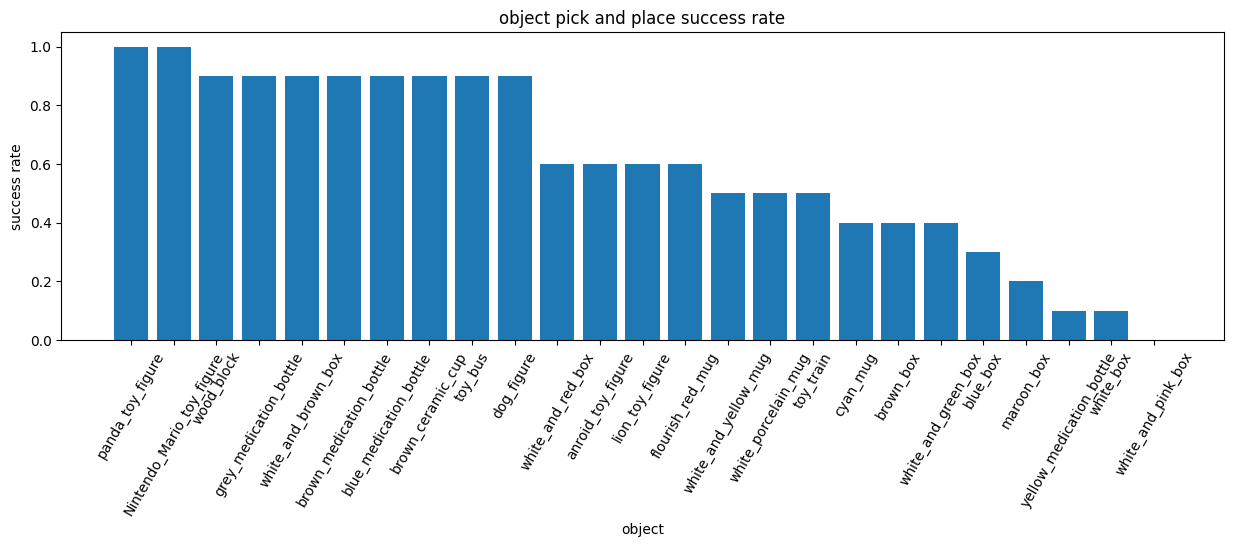

In [13]:
# sort the ratio dictionary by values in descending order
sorted_ratio = dict(sorted(ratio.items(), key=lambda x: x[1], reverse=True))

# plot the sorted ratio
plt.figure(figsize=(15, 4))
# remove the 'pick_and_place' prefix in the keys
x_labels = [key[15:] for key in sorted_ratio.keys()]
plt.bar(x_labels, sorted_ratio.values())
plt.xticks(rotation=60)
plt.xlabel('object')
plt.ylabel('success rate')
plt.title('object pick and place success rate')
plt.show()


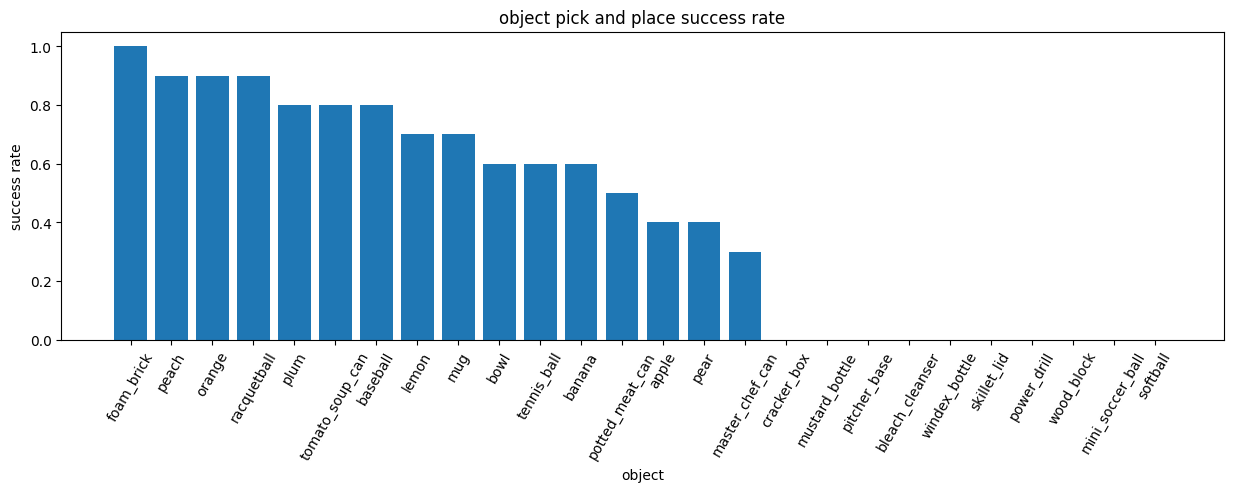

In [17]:
# sort the ratio dictionary by values in descending order
sorted_ratio = dict(sorted(ratio.items(), key=lambda x: x[1], reverse=True))

# plot the sorted ratio
plt.figure(figsize=(15, 4))
# remove the 'pick_and_place' prefix in the keys
x_labels = [key[15:] for key in sorted_ratio.keys()]
plt.bar(x_labels, sorted_ratio.values())
plt.xticks(rotation=60)
plt.xlabel('object')
plt.ylabel('success rate')
plt.title('object pick and place success rate')
plt.show()

In [10]:
# get all object ids with ratio >= 0.8 
object_ids = []
for key, value in sorted_ratio.items():
    if value >= 0.8:
        object_ids.append(key[15:])
print(object_ids)
print(len(object_ids))

['panda_toy_figure', 'Nintendo_Mario_toy_figure', 'wood_block', 'grey_medication_bottle', 'white_and_brown_box', 'brown_medication_bottle', 'blue_medication_bottle', 'brown_ceramic_cup', 'toy_bus', 'dog_figure']
10


In [8]:
# get all object ids with ratio >= 0.8 
object_ids = []
for key, value in sorted_ratio.items():
    if value >= 0.8:
        object_ids.append(key[15:])
print(object_ids)
print(len(object_ids))

['foam_brick', 'peach', 'orange', 'racquetball', 'plum', 'tomato_soup_can', 'baseball']
7


## Drawer pick and place 

In [12]:
raw_result_file = "/home/junting/catkin_ws/src/llm-manipulation-bench/instruct_to_policy/data/benchmark/eval_results/drawer_pick_and_place_20240126-16:00.json"
with open(raw_result_file, "r") as f:
    results = json.load(f)

In [24]:
# load the results list to a dataframe
# each row is a query, each column is a step in the eval_items_results list

def load_results_to_dataframe(results):
    # Initialize an empty list to store the rows
    rows = []

    # Iterate over the data list
    for result in results:
        # Iterate over the items in each data dict
        eval_items_results_list = []
        row = {
            # skip pick_and_place_xxxx
            'query': result['query'][15:]
        }
        # Add the eval_items_results to the row
        for i in range(result['repeat_times']):
            eval_items_results_list.append(result[str(i)]['eval_items_results'])

        # for each column in eval_items_results_list, calculate the mean
        eval_items_results_arr = np.array(eval_items_results_list)
        eval_items_results_mean = np.mean(eval_items_results_arr, axis=0)
        for j in range(len(eval_items_results_mean)):
            row[f'step_{j}'] = eval_items_results_mean[j]

        # Add the row to the list of rows
        rows.append(row)

    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows)

    return df
df = load_results_to_dataframe(results)

# change the step_0, step_1 column to open drawer and place object
df = df.rename(columns={'step_0': 'open_drawer', 'step_1': 'place_object'})

In [25]:
df

,query,open_drawer,place_object
0,wood_block,1.0,0.8
1,grey_medication_bottle,0.9,0.4
2,white_and_brown_box,1.0,0.6
3,panda_toy_figure,1.0,0.9
4,brown_medication_bottle,1.0,0.2
5,blue_medication_bottle,0.9,0.7
6,brown_ceramic_cup,0.9,0.5
7,toy_bus,1.0,0.8
8,Nintendo_Mario_toy_figure,0.9,0.8
9,dog_figure,1.0,0.5
